In [8]:
import pandas as pd
import numpy as np
import pylab as plt

df = pd.read_csv('C:/Users/Ike/Documents/Academics/Learning/Data analysis/Projects/New folder/SVMtrain.csv')


In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [101]:
df['Sex'] = df['Sex'].str.capitalize() 
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBin
0,1,0,3,Male,22.0,1,0,7.2500,3,"(18, 25]"
1,2,1,1,Female,38.0,1,0,71.2833,1,"(25, 40]"
2,3,1,3,Female,26.0,0,0,7.9250,3,"(25, 40]"
3,4,1,1,Female,35.0,1,0,53.1000,3,"(25, 40]"
4,5,0,3,Male,35.0,0,0,8.0500,3,"(25, 40]"


In [7]:
df.shape

(889, 9)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [10]:
df.isnull().value_counts()

PassengerId  Survived  Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False        False     False   False  False  False  False  False  False       889
Name: count, dtype: int64

In [13]:
pd.DataFrame(df.dtypes, columns=['Data Types'])



,Data Types
PassengerId,int64
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


In [23]:
df['Survived'].groupby(df['Pclass']).agg([sum])

C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\2326021358.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['Survived'].groupby(df['Pclass']).agg([sum])


,sum
Pclass,
1,134
2,87
3,119


C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\646954787.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['Survived'].groupby(df['Pclass']).agg(sum)


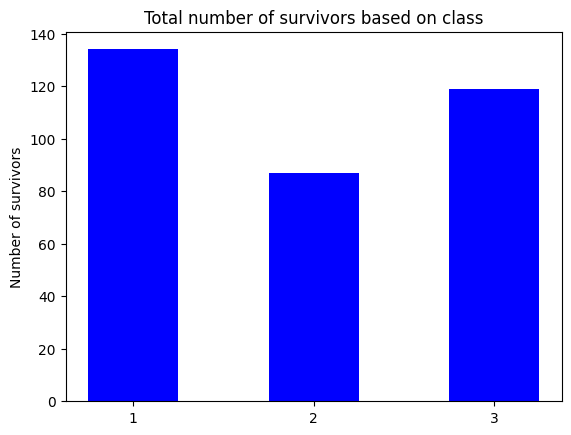

In [38]:
#Total Passengers in each class
df['Survived'].groupby(df['Pclass']).agg(sum)
#Total Passengers in each class
total_passengers = df['PassengerId'].groupby(df['Pclass']).count()
survivor_percentage = survivors / total_passengers

#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(),  
          survivors, color='blue', width=0.5)
ax.set_ylabel('Number of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())




C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\3229914835.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  male_survivors = df[df['Sex'] == 'Male'].groupby('Pclass')['Survived'].agg(sum)
C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\3229914835.py:9: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  female_survivors = df[df['Sex'] == 'Female'].groupby('Pclass')['Survived'].agg(sum)


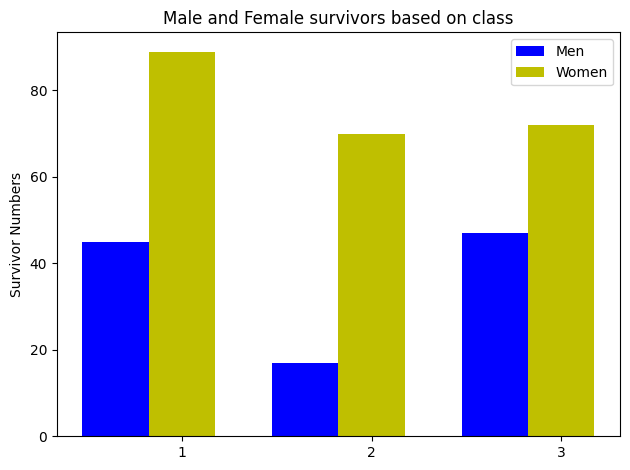

Pclass
1    0.967391
2    0.921053
3    0.500000
dtype: float64

In [95]:
# Capitalize the 'Sex' column values
male_survivors = df[df['Sex'] == 'Male'].groupby('Pclass')['Survived'].agg(sum)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'Male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers

# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'Female'].groupby('Pclass')['Survived'].agg(sum)

#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'Female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / female_total_passengers

#Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')

ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.legend()
plt.tight_layout()
plt.show()





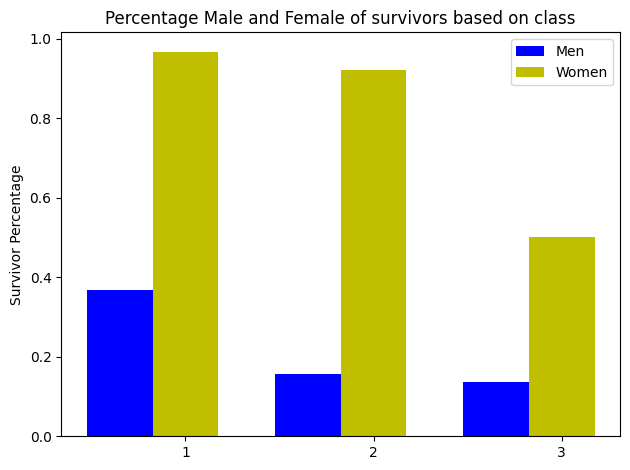

In [97]:
 #Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width,  color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)

plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\1971021615.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\1971021615.py:11: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
C:\Users\Ike\AppData\Local\Temp\ipykernel_6568\1971021615.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

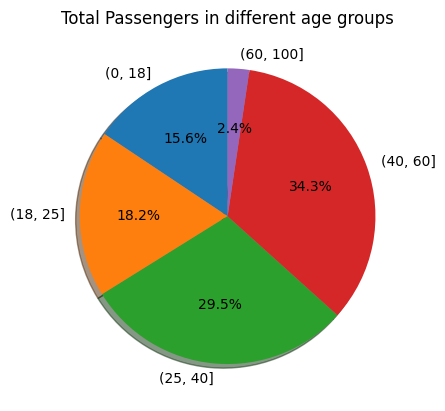

In [98]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

#Removing the null rows
d_temp = df[np.isfinite(df['Age'])]  # removing all na instances

#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

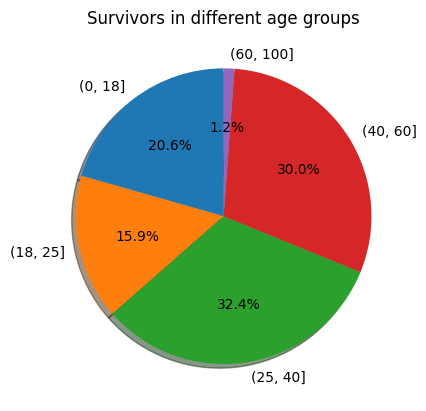

In [99]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(),
     autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()